<a href="https://colab.research.google.com/github/SergeyShchus/OSM/blob/main/Notebook/cities/Enerhodar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/marceloprates/prettymaps.git
!pip install matplotlib==3.1.3

!mkdir ../prints
!mkdir ../assets
!mkdir ../assets
!mkdir ../assets/Permanent_Marker/
!wget -O ../assets/Permanent_Marker/PermanentMarker-Regular.ttf https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/marceloprates/prettymaps.git to /tmp/pip-req-build-wshs8hdn
  Running command git clone -q https://github.com/marceloprates/prettymaps.git /tmp/pip-req-build-wshs8hdn
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.0.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


mkdir: cannot create directory ‘../prints’: File exists
mkdir: cannot create directory ‘../assets’: File exists
mkdir: cannot create directory ‘../assets’: File exists
mkdir: cannot create directory ‘../assets/Permanent_Marker/’: File exists
--2022-07-16 10:05:21--  https://github.com/marceloprates/prettymaps/raw/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/marceloprates/prettymaps/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf [following]
--2022-07-16 10:05:21--  https://raw.githubusercontent.com/marceloprates/prettymaps/main/assets/Permanent_Marker/PermanentMarker-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [2]:
#work

# For local execution (does not require installing the library):
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

#import prettymaps, matplotlib and google.colab files
from prettymaps import *
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from google.colab import files

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated an

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

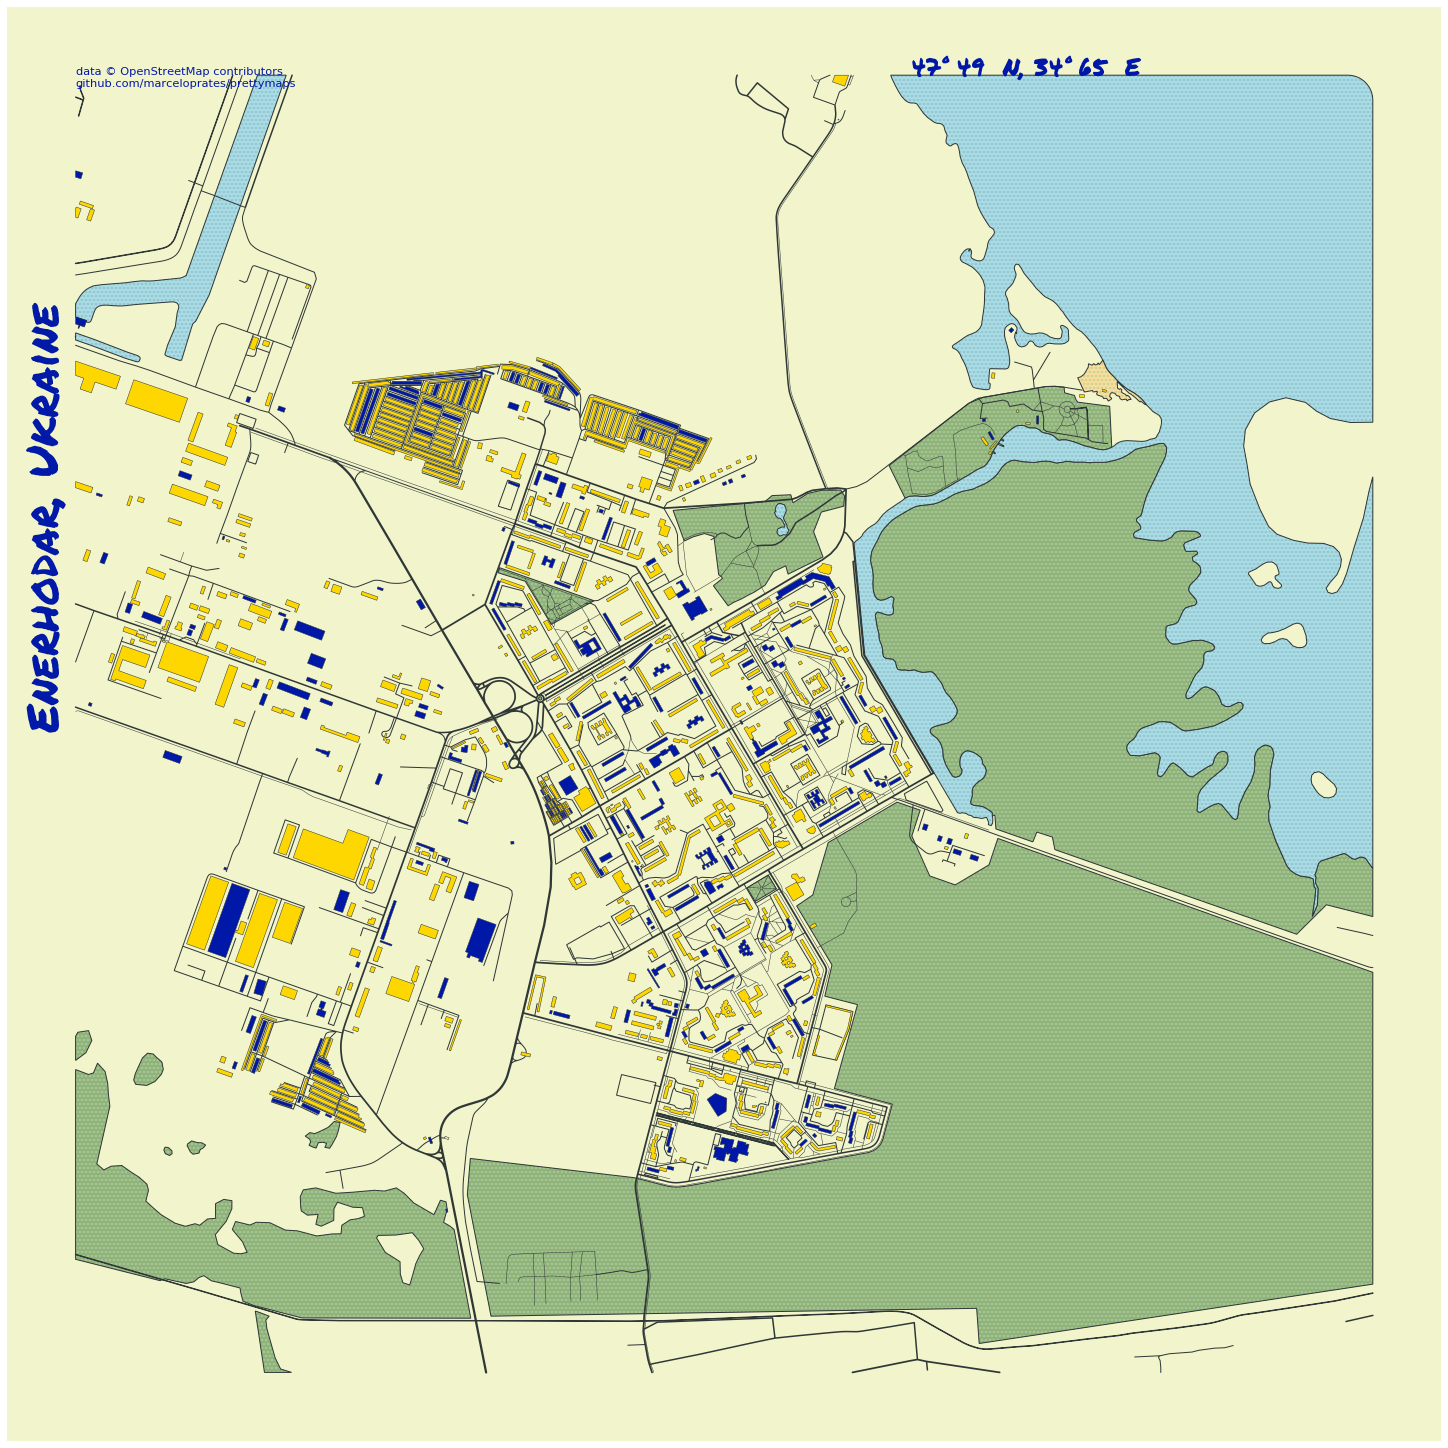

In [5]:
fig, ax = plt.subplots(figsize = (20, 20), constrained_layout = True)
palette = ['#FFD700','#0018a8','#FFD700']
dilate = 100
background_c = '#F2F4CB'
layers = plot(
  #Centre the map center at 
  (47.496020, 34.658467),
  #Set radius for the map
  radius = 2500,
  ax=ax,
  #Name and select the various layers we want on the map
  #We want a square map so ensure that we're not querying for data in a circle
  layers = {
      #we want a square layout, so 
      'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {
                'tags':{
                    'waterway': True,
                    'water': True,
                    'harbour': True,
                    'marina': True,
                    'bay': True,
                    'river': True
                }, 
                'circle': False, 'dilate': dilate
            },
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            
        },

        osm_credit = {'color': '#0018a8'}
)


# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

# Draw left text
ax.text(
    xmin-.06*dx, ymin+.5*dy,
    'Enerhodar, Ukraine',
    color = '#0018a8',
    rotation = 90,
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 45),
)
# Draw top text
ax.text(
    xmax-.35*dx, ymax+.02*dy,
    "47° 49′ N, 34° 65′ E",
    color = '#0018a8',
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 25),
)


#Export a copy
plt.savefig('../prints/Enerhodar.png')

#Trigger a browser download
files.download('../prints/Enerhodar.png')

/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated an

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

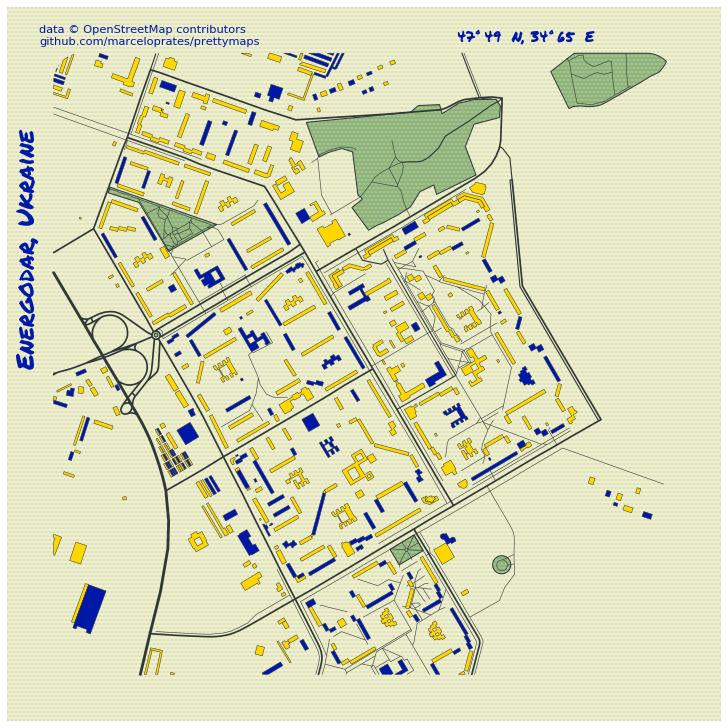

In [7]:
# Style parameters
palette = ['#FFD700','#0018a8','#FFD700']
background_c = '#F2F4CB'
dilate = 100

# Setup figure
fig, ax = plt.subplots(figsize = (10, 10), constrained_layout = True)

# Plot
layers = plot(
    (47.496020, 34.658467), radius = 1000,
    ax = ax,
    layers = {
        'perimeter': {'circle': False, 'dilate': dilate},
        'streets': {
            'width': {
                'primary': 5,
                'secondary': 4,
                'tertiary': 3,
                'residential': 2,
                'footway': 1,
            },
            'circle': False,
            'dilate': dilate
        },
        'building': {
            'tags': {'building': True},
            'union': False,
            'circle': False,
            'dilate': dilate
        },
        'green': {
            'tags': {
                'landuse': ['grass', 'village_green'],
                'leisure': 'park'
            },
            'circle': False,
            'dilate': dilate
        },
    },
    drawing_kwargs = {
        'background': {'fc': '#F2F4CB', 'ec': '#dadbc1', 'hatch': 'ooo...', 'zorder': -1},
        'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
        'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
        'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
        'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
        'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
    },
    osm_credit = {'x': .02, 'y': .01, 'color': '#0018a8'}
)

# Set bounds
xmin, ymin, xmax, ymax = layers['perimeter'].bounds
dx, dy = xmax-xmin, ymax-ymin
ax.set_xlim(xmin-.06*dx, xmax+.06*dx)
ax.set_ylim(ymin-.06*dy, ymax+.06*dy)

# Draw left text
ax.text(
    xmin-.06*dx, ymin+.5*dy,
    'Energodar, Ukraine',
    color = '#0018a8',
    rotation = 90,
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 25),
)
# Draw top text
ax.text(
    xmax-.35*dx, ymax+.02*dy,
    "47° 49′ N, 34° 65′ E",
    color = '#0018a8',
    fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 15),
)

plt.savefig('../prints/Energodar_pr.png')
plt.savefig('../prints/Energodar_pr.svg')
#Trigger a browser download
files.download('../prints/Energodar_pr.png')